In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import (RandomForestClassifier,RandomForestRegressor, ExtraTreesClassifier,
                              BaggingClassifier, AdaBoostRegressor)
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier


import warnings

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report


In [2]:
# Load the final csv 
usda_instacart_final_df= pd.read_csv('./prepared_data/USDA_Insta_Final_Data.csv',index_col = 'Unnamed: 0')

In [3]:
usda_instacart_final_df.shape

(47877, 31)

In [4]:
usda_instacart_final_df.columns

Index(['NDB_No', 'Long_Desc', 'product_id', 'product_name', 'Calcium, Ca (mg)',
       'Cholesterol (mg)', 'Energy (kcal)',
       'Fatty acids, total monounsaturated (g)',
       'Fatty acids, total polyunsaturated (g)',
       'Fatty acids, total saturated (g)', 'Fatty acids, total trans (g)',
       'Fiber, total dietary (g)', 'Iron, Fe (mg)', 'Protein (g)',
       'Sodium, Na (mg)', 'Sugars, total (g)', 'Total lipid (fat) (g)',
       'Water (g)', 'order_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'department', 'aisle'],
      dtype='object')

In [5]:
usda_instacart_final_df= usda_instacart_final_df.drop(columns=['order_id','user_id','product_id',
                                            'department_id','product_name',
                                            'aisle_id','aisle','department','eval_set',
                                            'Long_Desc', 'product_id', 'product_name', 'Calcium, Ca (mg)',
                                            'Energy (kcal)','Fatty acids, total monounsaturated (g)',
                                            'Fatty acids, total polyunsaturated (g)',
                                            'Fatty acids, total saturated (g)', 'Fatty acids, total trans (g)',
                                            'Fiber, total dietary (g)', 'Iron, Fe (mg)',
                                            'Sodium, Na (mg)','Water (g)'],axis=1)
usda_instacart_final_df.head()

,NDB_No,Cholesterol (mg),Protein (g),"Sugars, total (g)",Total lipid (fat) (g),add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1119,5.0,4.93,13.8,1.25,2,1,16,6,20,14.0
1,1119,5.0,4.93,13.8,1.25,1,0,17,3,13,19.0
2,1119,5.0,4.93,13.8,1.25,1,0,1,2,14,0.0
3,1119,5.0,4.93,13.8,1.25,1,1,26,5,13,7.0
4,1119,5.0,4.93,13.8,1.25,5,1,3,3,16,30.0


In [6]:
# define X and y
X = usda_instacart_final_df.drop('reordered', axis=1)
y = usda_instacart_final_df['reordered']

In [7]:
# base line
y.value_counts(normalize = True)

0    0.501138
1    0.498862
Name: reordered, dtype: float64

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [9]:
lr = LogisticRegression()                          # instantiate the model
lr.fit(X_train,y_train)                            # fit the model
print("train score:", lr.score(X_train, y_train))
print("test score:", lr.score(X_test, y_test))

train score: 0.690538000179035
test score: 0.6978557504873294


/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# evaluate the model
# evaluate the metrics
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("accuracy:", accuracy_score(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print("f1 score:",f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5664 1534]
 [2806 4360]]
accuracy: 0.6978557504873294
tn, fp, fn, tp: 5664 1534 2806 4360
f1 score: 0.6676875957120979
              precision    recall  f1-score   support

           0       0.67      0.79      0.72      7198
           1       0.74      0.61      0.67      7166

   micro avg       0.70      0.70      0.70     14364
   macro avg       0.70      0.70      0.70     14364
weighted avg       0.70      0.70      0.70     14364



In [11]:
bag = BaggingClassifier() # instantiate the model
bag.fit(X_train, y_train) # fit the model
print("train score:", bag.score(X_train, y_train))
print("test score:", bag.score(X_test, y_test))

train score: 0.983469101542685
test score: 0.70843776106934


In [12]:
# evaluate the model
# evaluate the metrics

y_pred_bag = bag.predict(X_test)
print(confusion_matrix(y_test, y_pred_bag))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_bag).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print("accuracy:", accuracy_score(y_test, y_pred_bag))
print("f1 score:",f1_score(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

[[5327 1871]
 [2317 4849]]
tn, fp, fn, tp: 5327 1871 2317 4849
accuracy: 0.70843776106934
f1 score: 0.6984012674636324
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      7198
           1       0.72      0.68      0.70      7166

   micro avg       0.71      0.71      0.71     14364
   macro avg       0.71      0.71      0.71     14364
weighted avg       0.71      0.71      0.71     14364



In [13]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5) # instantiate the model
tree.fit(X_train, y_train)                 # fit the model
print("train score:", tree.score(X_train, y_train))
print("train score:", tree.score(X_test, y_test))

train score: 0.7172142153791066
train score: 0.7201336675020885


In [14]:
# evaluate the model
# evaluate the metrics

y_pred_tree = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_tree).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print("accuracy:", accuracy_score(y_test, y_pred_tree))
print("f1 score:",f1_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[4711 2487]
 [1533 5633]]
tn, fp, fn, tp: 4711 2487 1533 5633
accuracy: 0.7201336675020885
f1 score: 0.7370142614156746
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      7198
           1       0.69      0.79      0.74      7166

   micro avg       0.72      0.72      0.72     14364
   macro avg       0.72      0.72      0.72     14364
weighted avg       0.72      0.72      0.72     14364



In [15]:
# Random forest classifier
rfc = RandomForestClassifier(random_state=42) # instantiate the model
rfc.fit(X_train, y_train)                     # fit the model
print("train score:", rfc.score(X_train, y_train))
print("test score:", rfc.score(X_test, y_test))

/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9837674932115895
test score: 0.7130325814536341


In [16]:
# grid search
params = {'n_estimators':[5,10,50,100], 'max_depth':[None,2,3,4,10,11]}
grid = GridSearchCV(rfc, param_grid = params,cv=2,verbose=1)
grid.fit(X_train,y_train)
print("grid.best_score_:", grid.best_score_)
print("grid.best_params_:", grid.best_params_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   16.8s finished


grid.best_score_: 0.7328797779965983
grid.best_params_: {'max_depth': 10, 'n_estimators': 100}


In [17]:
# evaluate the model
# evaluate the metrics

y_pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred_rfc))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_rfc).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print("accuracy:", accuracy_score(y_test, y_pred_rfc))
print("f1 score:",f1_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[5356 1842]
 [2280 4886]]
tn, fp, fn, tp: 5356 1842 2280 4886
accuracy: 0.7130325814536341
f1 score: 0.7033251763351086
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      7198
           1       0.73      0.68      0.70      7166

   micro avg       0.71      0.71      0.71     14364
   macro avg       0.71      0.71      0.71     14364
weighted avg       0.71      0.71      0.71     14364



In [18]:
probs = grid.best_estimator_.predict_proba(X_test) # Predict probabilities for the test data.
preds = probs[:,1] # Keep Probabilities of the positive class only
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8261537688741493


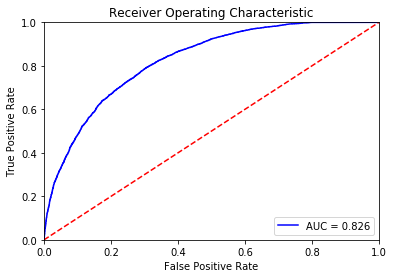

In [19]:
# calculate the fpr and tpr for all thresholds of the classification
probs = grid.best_estimator_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


# plot roc curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


In [20]:
from sklearn.ensemble import AdaBoostClassifier

scores_test = []
scores_train = []
n_estimators = []

for n_est in range(30):
    ada = AdaBoostClassifier(n_estimators=n_est+1, random_state=42) # instantiate the model
    ada.fit(X_train, y_train) # fit the model
    n_estimators.append(n_est+1)
    scores_test.append(ada.score(X_test, y_test))
    scores_train.append(ada.score(X_train, y_train))

In [21]:
print("test score:", ada.score(X_test, y_test))
print("train score:", ada.score(X_train, y_train))

test score: 0.7300194931773879
train score: 0.7258974129442306


In [22]:
# Create adaboost-decision tree classifer 
# abc = AdaBoostClassifier(n_estimators=30,
#                          learning_rate=1,
#                          random_state=42)
# # Train model
# model = abc.fit(X, y)

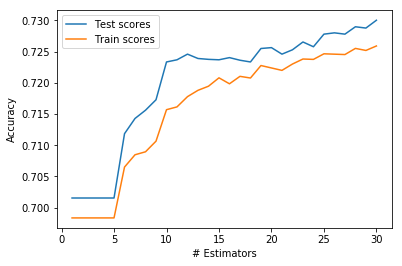

In [23]:

plt.plot(n_estimators, scores_test, label='Test scores')
plt.plot(n_estimators, scores_train, label='Train scores')
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
y_pred_ada = ada.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred_ada))

Accuracy: 0.7300194931773879


In [26]:
# evaluation metrics
print((confusion_matrix(y_test, y_pred_ada)))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_ada).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
print("f1 score:",f1_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

[[5045 2153]
 [1725 5441]]
tn, fp, fn, tp: 5045 2153 1725 5441
f1 score: 0.7372628726287264
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      7198
           1       0.72      0.76      0.74      7166

   micro avg       0.73      0.73      0.73     14364
   macro avg       0.73      0.73      0.73     14364
weighted avg       0.73      0.73      0.73     14364

